# Exploratory Data Analysis (EDA) of MTA Turnstile Data

In [1]:
# Topic:        Project 1
# Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
# Date:         09/06/2020
# Name:         yalin yener

In [2]:
# Importing Libraries

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
# Reading Multiple txt Files and Creating Data Frame

path = '/Users/yalinyener/GitHub/yalinyener/EDA-MTA-Turnstile/data/2019_01_05' # get path for all files that used by EDA

all_files = glob.glob(path + "/*.txt")

# create empty list and append all files

file_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    file_list.append(df)

# Concatenate all data into one DataFrame that called "mta"
  
mta = pd.concat(file_list)              

In [4]:
#Checking DataFrame's first 10 rows

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178


In [5]:
#Checking DataFrame size

mta.shape

(4480606, 11)

In [6]:
#Checking general info about dataframe

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
# Checking columns names

mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
#Checking duplicates rows and drop.

mta.drop_duplicates(subset=None, keep="first", inplace=True)

In [10]:
#Checking null values based on columns

mta.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
#Checking basic descriptive statistics for numerical columns.

mta.describe()

,ENTRIES,EXITS
count,4.480606e+06,4.480606e+06
mean,4.088585e+07,3.365294e+07
std,2.097226e+08,1.941850e+08
min,0.000000e+00,0.000000e+00
25%,3.937772e+05,1.663580e+05
50%,2.296828e+06,1.318136e+06
75%,6.822866e+06,4.712473e+06
max,2.129552e+09,2.124342e+09


In [12]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

mta["TURNSTILE"] = mta["C/A"]+"-"+mta["UNIT"]+"-"+mta["SCP"]

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178,A002-R051-02-00-00


In [13]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

mta['DATETIME'] = mta["DATE"]+ " " + mta["TIME"]

mta['DATETIME'] = pd.to_datetime(mta['DATETIME'], format='%m/%d/%Y %H:%M:%S')

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 478.6+ MB


In [14]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00,2019-01-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00,2019-01-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00,2019-01-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00,2019-01-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00,2019-01-19 19:00:00


In [15]:
#Create a column that called "NAMEOFDAY"
mta["NAMEOFDAY"]= mta["DATETIME"].dt.day_name()

#Checking sample 5 rows
mta.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,NAMEOFDAY
8039,A047,R087,00-06-01,CITY HALL,NRW,BMT,05/31/2019,16:00:00,REGULAR,185437510,17229254,A047-R087-00-06-01,2019-05-31 16:00:00,Friday
91037,N405,R239,00-06-02,GREENPOINT AV,G,IND,05/31/2019,04:00:00,REGULAR,19789,77753,N405-R239-00-06-02,2019-05-31 04:00:00,Friday
65627,N124,R103,00-00-01,BROADWAY JCT,ACJLZ,IND,05/31/2019,12:00:00,REGULAR,8941060,8793307,N124-R103-00-00-01,2019-05-31 12:00:00,Friday
185435,R528,R097,00-05-01,JUNCTION BLVD,7,IRT,03/14/2019,12:00:00,REGULAR,5066641,5539779,R528-R097-00-05-01,2019-03-14 12:00:00,Thursday
177333,R413,R325,00-05-01,WHITLOCK AV,6,IRT,05/08/2019,00:00:00,REGULAR,524288,44,R413-R325-00-05-01,2019-05-08 00:00:00,Wednesday


In [16]:
# Working with only neccessary columns

mta = mta[["STATION","TURNSTILE","DATE","TIME","DATETIME","NAMEOFDAY","ENTRIES","EXITS"]]
mta.head(10)

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,01/19/2019,03:00:00,2019-01-19 03:00:00,Saturday,6914752,2344809
1,59 ST,A002-R051-02-00-00,01/19/2019,07:00:00,2019-01-19 07:00:00,Saturday,6914764,2344821
2,59 ST,A002-R051-02-00-00,01/19/2019,11:00:00,2019-01-19 11:00:00,Saturday,6914825,2344898
3,59 ST,A002-R051-02-00-00,01/19/2019,15:00:00,2019-01-19 15:00:00,Saturday,6915047,2344971
4,59 ST,A002-R051-02-00-00,01/19/2019,19:00:00,2019-01-19 19:00:00,Saturday,6915367,2345026
5,59 ST,A002-R051-02-00-00,01/19/2019,23:00:00,2019-01-19 23:00:00,Saturday,6915525,2345049
6,59 ST,A002-R051-02-00-00,01/20/2019,03:00:00,2019-01-20 03:00:00,Sunday,6915559,2345064
7,59 ST,A002-R051-02-00-00,01/20/2019,07:00:00,2019-01-20 07:00:00,Sunday,6915565,2345072
8,59 ST,A002-R051-02-00-00,01/20/2019,11:00:00,2019-01-20 11:00:00,Sunday,6915628,2345125
9,59 ST,A002-R051-02-00-00,01/20/2019,15:00:00,2019-01-20 15:00:00,Sunday,6915778,2345178


In [17]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2018-12-29 00:00:00


In [18]:
#Working with these dates beetween 01.01.2019 and 31.05.2019

mta = mta[mta["DATETIME"]>="2019"]
mta.shape

(4394408, 8)

In [19]:
#Controlling maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2019-01-01 00:00:00


In [25]:
#Checking unique Station values and number of Station

print(mta["STATION"].unique())

len(mta["STATION"].unique())

['59 ST' '5 AV/59 ST' '57 ST-7 AV' '49 ST' 'TIMES SQ-42 ST'
 '34 ST-HERALD SQ' '28 ST' '23 ST' '14 ST-UNION SQ' '8 ST-NYU' 'PRINCE ST'
 'CANAL ST' 'CITY HALL' 'CORTLANDT ST' 'RECTOR ST' 'WHITEHALL S-FRY'
 'DELANCEY/ESSEX' 'BOWERY' 'CHAMBERS ST' 'FULTON ST' 'BROAD ST' '7 AV'
 'PARK PLACE' 'BOTANIC GARDEN' 'PROSPECT PARK' 'PARKSIDE AV' 'CHURCH AV'
 'BEVERLEY ROAD' 'CORTELYOU RD' 'NEWKIRK PLAZA' 'AVENUE H' 'AVENUE J'
 'AVENUE M' 'KINGS HWY' 'AVENUE U' 'NECK RD' 'SHEEPSHEAD BAY'
 'BRIGHTON BEACH' 'OCEAN PKWY' 'BOROUGH HALL' 'JAY ST-METROTEC'
 'DEKALB AV' 'ATL AV-BARCLAY' 'UNION ST' '4AV-9 ST' 'PROSPECT AV' '25 ST'
 '36 ST' '45 ST' '53 ST' 'BAY RIDGE AV' '77 ST' '86 ST' 'BAY RIDGE-95 ST'
 '8 AV' 'FT HAMILTON PKY' 'NEW UTRECHT AV' '18 AV' '20 AV' 'BAY PKWY'
 '9 AV' '50 ST' '55 ST' '71 ST' '79 ST' '25 AV' 'BAY 50 ST'
 'CONEY IS-STILLW' 'W 8 ST-AQUARIUM' '6 AV' '3 AV' '1 AV' 'BEDFORD AV'
 'LORIMER ST' 'GRAHAM AV' 'GRAND ST' 'MONTROSE AV' 'MORGAN AV'
 'JEFFERSON ST' 'MYRTLE-WYCKOFF' 'HALSEY ST'

379

In [24]:
#Checking unique TURNSTILE count

len(mta["TURNSTILE"].unique())

4932

In [26]:
#Checking some columns value's counts

print("Row count based on stations (First 10 rows)")
print(mta["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     91854
FULTON ST          87452
23 ST              65838
GRD CNTRL-42 ST    60944
86 ST              54543
CANAL ST           52935
34 ST-HERALD SQ    50303
CHAMBERS ST        49637
59 ST              47996
42 ST-PORT AUTH    47040
Name: STATION, dtype: int64


In [27]:
#Understanding data-1 (filtering one turnstile for only a month)
#This subset data (data-1) perform a good example 

mta_1 = mta[(mta["TURNSTILE"]=="A002-R051-02-00-00")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_1

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,03/23/2019,00:00:00,2019-03-23 00:00:00,Saturday,6989774,2370411
1,59 ST,A002-R051-02-00-00,03/23/2019,04:00:00,2019-03-23 04:00:00,Saturday,6989795,2370413
2,59 ST,A002-R051-02-00-00,03/23/2019,08:00:00,2019-03-23 08:00:00,Saturday,6989813,2370436
3,59 ST,A002-R051-02-00-00,03/23/2019,12:00:00,2019-03-23 12:00:00,Saturday,6989924,2370512
4,59 ST,A002-R051-02-00-00,03/23/2019,16:00:00,2019-03-23 16:00:00,Saturday,6990200,2370573
...,...,...,...,...,...,...,...,...
37,59 ST,A002-R051-02-00-00,03/01/2019,07:00:00,2019-03-01 07:00:00,Friday,6962111,2361714
38,59 ST,A002-R051-02-00-00,03/01/2019,11:00:00,2019-03-01 11:00:00,Friday,6962243,2362017
39,59 ST,A002-R051-02-00-00,03/01/2019,15:00:00,2019-03-01 15:00:00,Friday,6962502,2362082
40,59 ST,A002-R051-02-00-00,03/01/2019,19:00:00,2019-03-01 19:00:00,Friday,6963303,2362149


In [28]:
#Understanding data-1 with basic statistics values

mta_1.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,6.981504e+06,2.367944e+06
std,1.170877e+04,3.713283e+03
min,6.962094e+06,2.361672e+06
25%,6.972010e+06,2.365118e+06
50%,6.981415e+06,2.367704e+06
75%,6.991446e+06,2.370866e+06
max,7.001895e+06,2.374553e+06


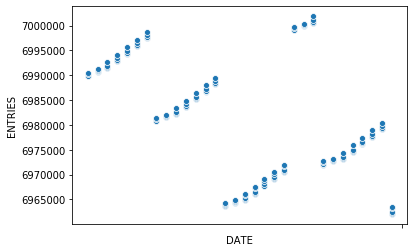

In [29]:
#Understanding data-1 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_1)
plt.xticks("")
plt.show()

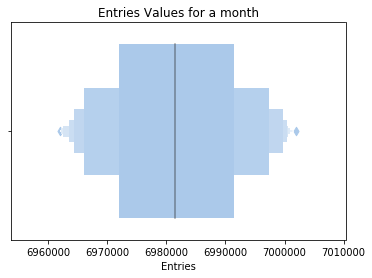

In [30]:
#Understanding data-1 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_1,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")


In [31]:
#Understanding data-2
#This subset data (data-1) perform a bad example (huge jump)

mta_2 = mta[(mta["TURNSTILE"]=="R252-R180-00-03-02")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_2

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
164686,103 ST,R252-R180-00-03-02,03/23/2019,01:00:00,2019-03-23 01:00:00,Saturday,2097086759,1711189207
164687,103 ST,R252-R180-00-03-02,03/23/2019,05:00:00,2019-03-23 05:00:00,Saturday,2097086746,1711189119
164688,103 ST,R252-R180-00-03-02,03/23/2019,09:00:00,2019-03-23 09:00:00,Saturday,2097086648,1711188991
164689,103 ST,R252-R180-00-03-02,03/23/2019,13:00:00,2019-03-23 13:00:00,Saturday,2097086393,1711188734
164690,103 ST,R252-R180-00-03-02,03/23/2019,17:00:00,2019-03-23 17:00:00,Saturday,2097086117,1711188326
...,...,...,...,...,...,...,...,...
163829,103 ST,R252-R180-00-03-02,03/01/2019,04:00:00,2019-03-01 04:00:00,Friday,8560879,26864157
163830,103 ST,R252-R180-00-03-02,03/01/2019,08:00:00,2019-03-01 08:00:00,Friday,8561105,26864399
163831,103 ST,R252-R180-00-03-02,03/01/2019,12:00:00,2019-03-01 12:00:00,Friday,8561558,26864833
163832,103 ST,R252-R180-00-03-02,03/01/2019,16:00:00,2019-03-01 16:00:00,Friday,8562057,26865365


In [33]:
#Understanding data-2 with basic statistics values

mta_2.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,7.294800e+08,6.082669e+08
std,9.954612e+08,8.027978e+08
min,8.560857e+06,2.686409e+07
25%,8.572374e+06,2.688148e+07
50%,8.580069e+06,2.689884e+07
75%,2.097077e+09,1.711174e+09
max,2.097089e+09,1.711193e+09


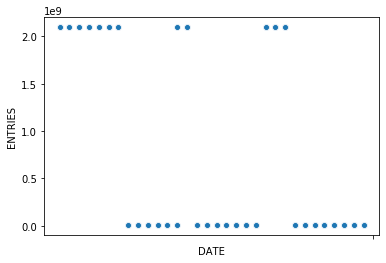

In [34]:
#Understanding data-2 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_2)
plt.xticks("")
plt.show()

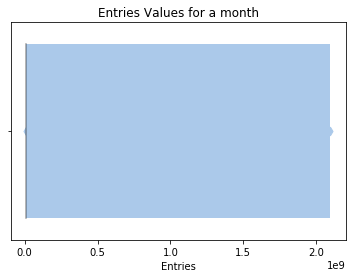

In [35]:
#Understanding data-2 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_2,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")

In [36]:
#Finding Daily traffic(entries+exits) based on turnstile

mta_entries = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()

mta_entries = mta_entries.reset_index()

mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits.sample(10)

,STATION,TURNSTILE,DATE,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
37484,14 ST-UNION SQ,R221-R170-01-03-01,05/18/2019,Saturday,2205,2897,5102
493764,HARRISON,PTH02-R544-00-00-03,03/16/2019,Saturday,357,136,493
554119,LEXINGTON AV/53,N305-R017-01-00-04,01/16/2019,Wednesday,543,719,1262
45890,15 ST-PROSPECT,N542-R241-00-06-00,02/21/2019,Thursday,750,647,1397
638439,QUEENS PLAZA,N309A-R140-00-06-00,03/16/2019,Saturday,30,273,303
522197,JAY ST-METROTEC,N102-R127-01-06-00,05/14/2019,Tuesday,449,174,623
180796,50 ST,N057-R188-00-03-00,05/29/2019,Wednesday,599,366,965
457380,FULTON ST,N095-R014-00-03-05,01/20/2019,Sunday,429,39,468
250518,86 ST,C025-R215-00-00-01,01/15/2019,Tuesday,1730,358,2088
218882,67 AV,N332-R219-01-06-02,05/03/2019,Friday,470,312,782


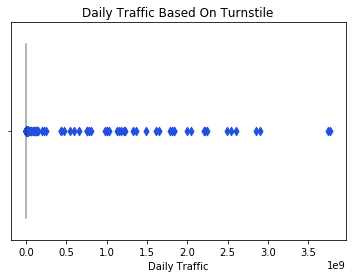

In [37]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

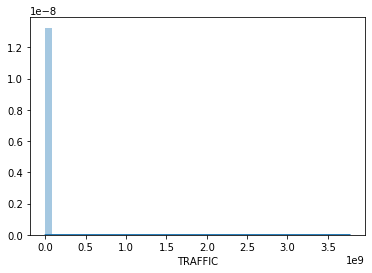

In [38]:
# Distplot for daily traffic

ax = sns.distplot(mta_entries_exits["TRAFFIC"])

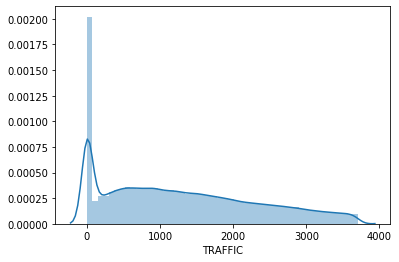

In [39]:
# Finding optimal daily traffic

mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

In [40]:
mta_entries_exits["TRAFFIC"].quantile(0.90)

3714.0

In [41]:
mta_traffic_under_percentileX.describe()

,ENTRIES,EXITS,TRAFFIC
count,655236.000000,655236.000000,655236.000000
mean,770.685925,541.028017,1311.713943
std,697.398262,561.187885,1029.728822
min,0.000000,0.000000,0.000000
25%,178.000000,101.000000,431.000000
50%,611.000000,370.000000,1162.000000
75%,1200.000000,804.000000,2059.000000
max,3624.000000,3710.000000,3713.000000


In [42]:
#Setting median values to giant values
mta_entries_exits["TRAFFIC"][mta_entries_exits["TRAFFIC"] > (mta_entries_exits.TRAFFIC.quantile(0.90))] = mta_entries_exits["TRAFFIC"].median() 


/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    728054.000000
mean       1314.435613
std         977.145314
min           0.000000
25%         512.000000
50%        1337.000000
75%        1939.000000
max        3714.000000
Name: TRAFFIC, dtype: float64

In [43]:
#Checking new values for "TRAFFIC" column

mta_entries_exits["TRAFFIC"].describe()

count    728054.000000
mean       1314.435613
std         977.145314
min           0.000000
25%         512.000000
50%        1337.000000
75%        1939.000000
max        3714.000000
Name: TRAFFIC, dtype: float64

In [44]:
mta_entries_exits.sort_values("TRAFFIC", ascending=False).head(10)

,STATION,TURNSTILE,DATE,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
410847,DELANCEY/ESSEX,N525-R142-01-00-04,02/04/2019,Monday,2096,1618,3714
505452,HOYT-SCHER,N108-R217-00-00-03,05/29/2019,Wednesday,1499,2215,3714
413695,DYCKMAN ST,R186-R036-00-00-00,01/30/2019,Wednesday,1562,2152,3714
505411,HOYT-SCHER,N108-R217-00-00-03,04/18/2019,Thursday,1446,2268,3714
718879,WORLD TRADE CTR,N094-R029-01-00-00,05/24/2019,Friday,1248,2466,3714
132994,34 ST-PENN STA,N073-R013-02-00-03,02/13/2019,Wednesday,1390,2324,3714
39561,145 ST,N020-R101-00-00-03,01/24/2019,Thursday,1705,2009,3714
507238,HUNTS POINT AV,R412-R146-00-00-00,05/03/2019,Friday,1842,1872,3714
145214,40 ST LOWERY ST,R518-R261-00-00-00,01/30/2019,Wednesday,894,2820,3714
678971,TIMES SQ-42 ST,A021-R032-01-00-05,01/10/2019,Thursday,1081,2633,3714


In [249]:
# Finding top 7 busiest stations based on traffic

mta_top7 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,136764780,200978938,25593350
1,FULTON ST,1247568281,1408264805,18832051
2,23 ST,61142042,1458528722,18146768
3,GRD CNTRL-42 ST,341402946,1546276276,16016348
4,86 ST,959741179,303488591,14657433
5,34 ST-HERALD SQ,280150892,244387095,14252706
6,TIMES SQ-42 ST,50359532,103271882,13889003


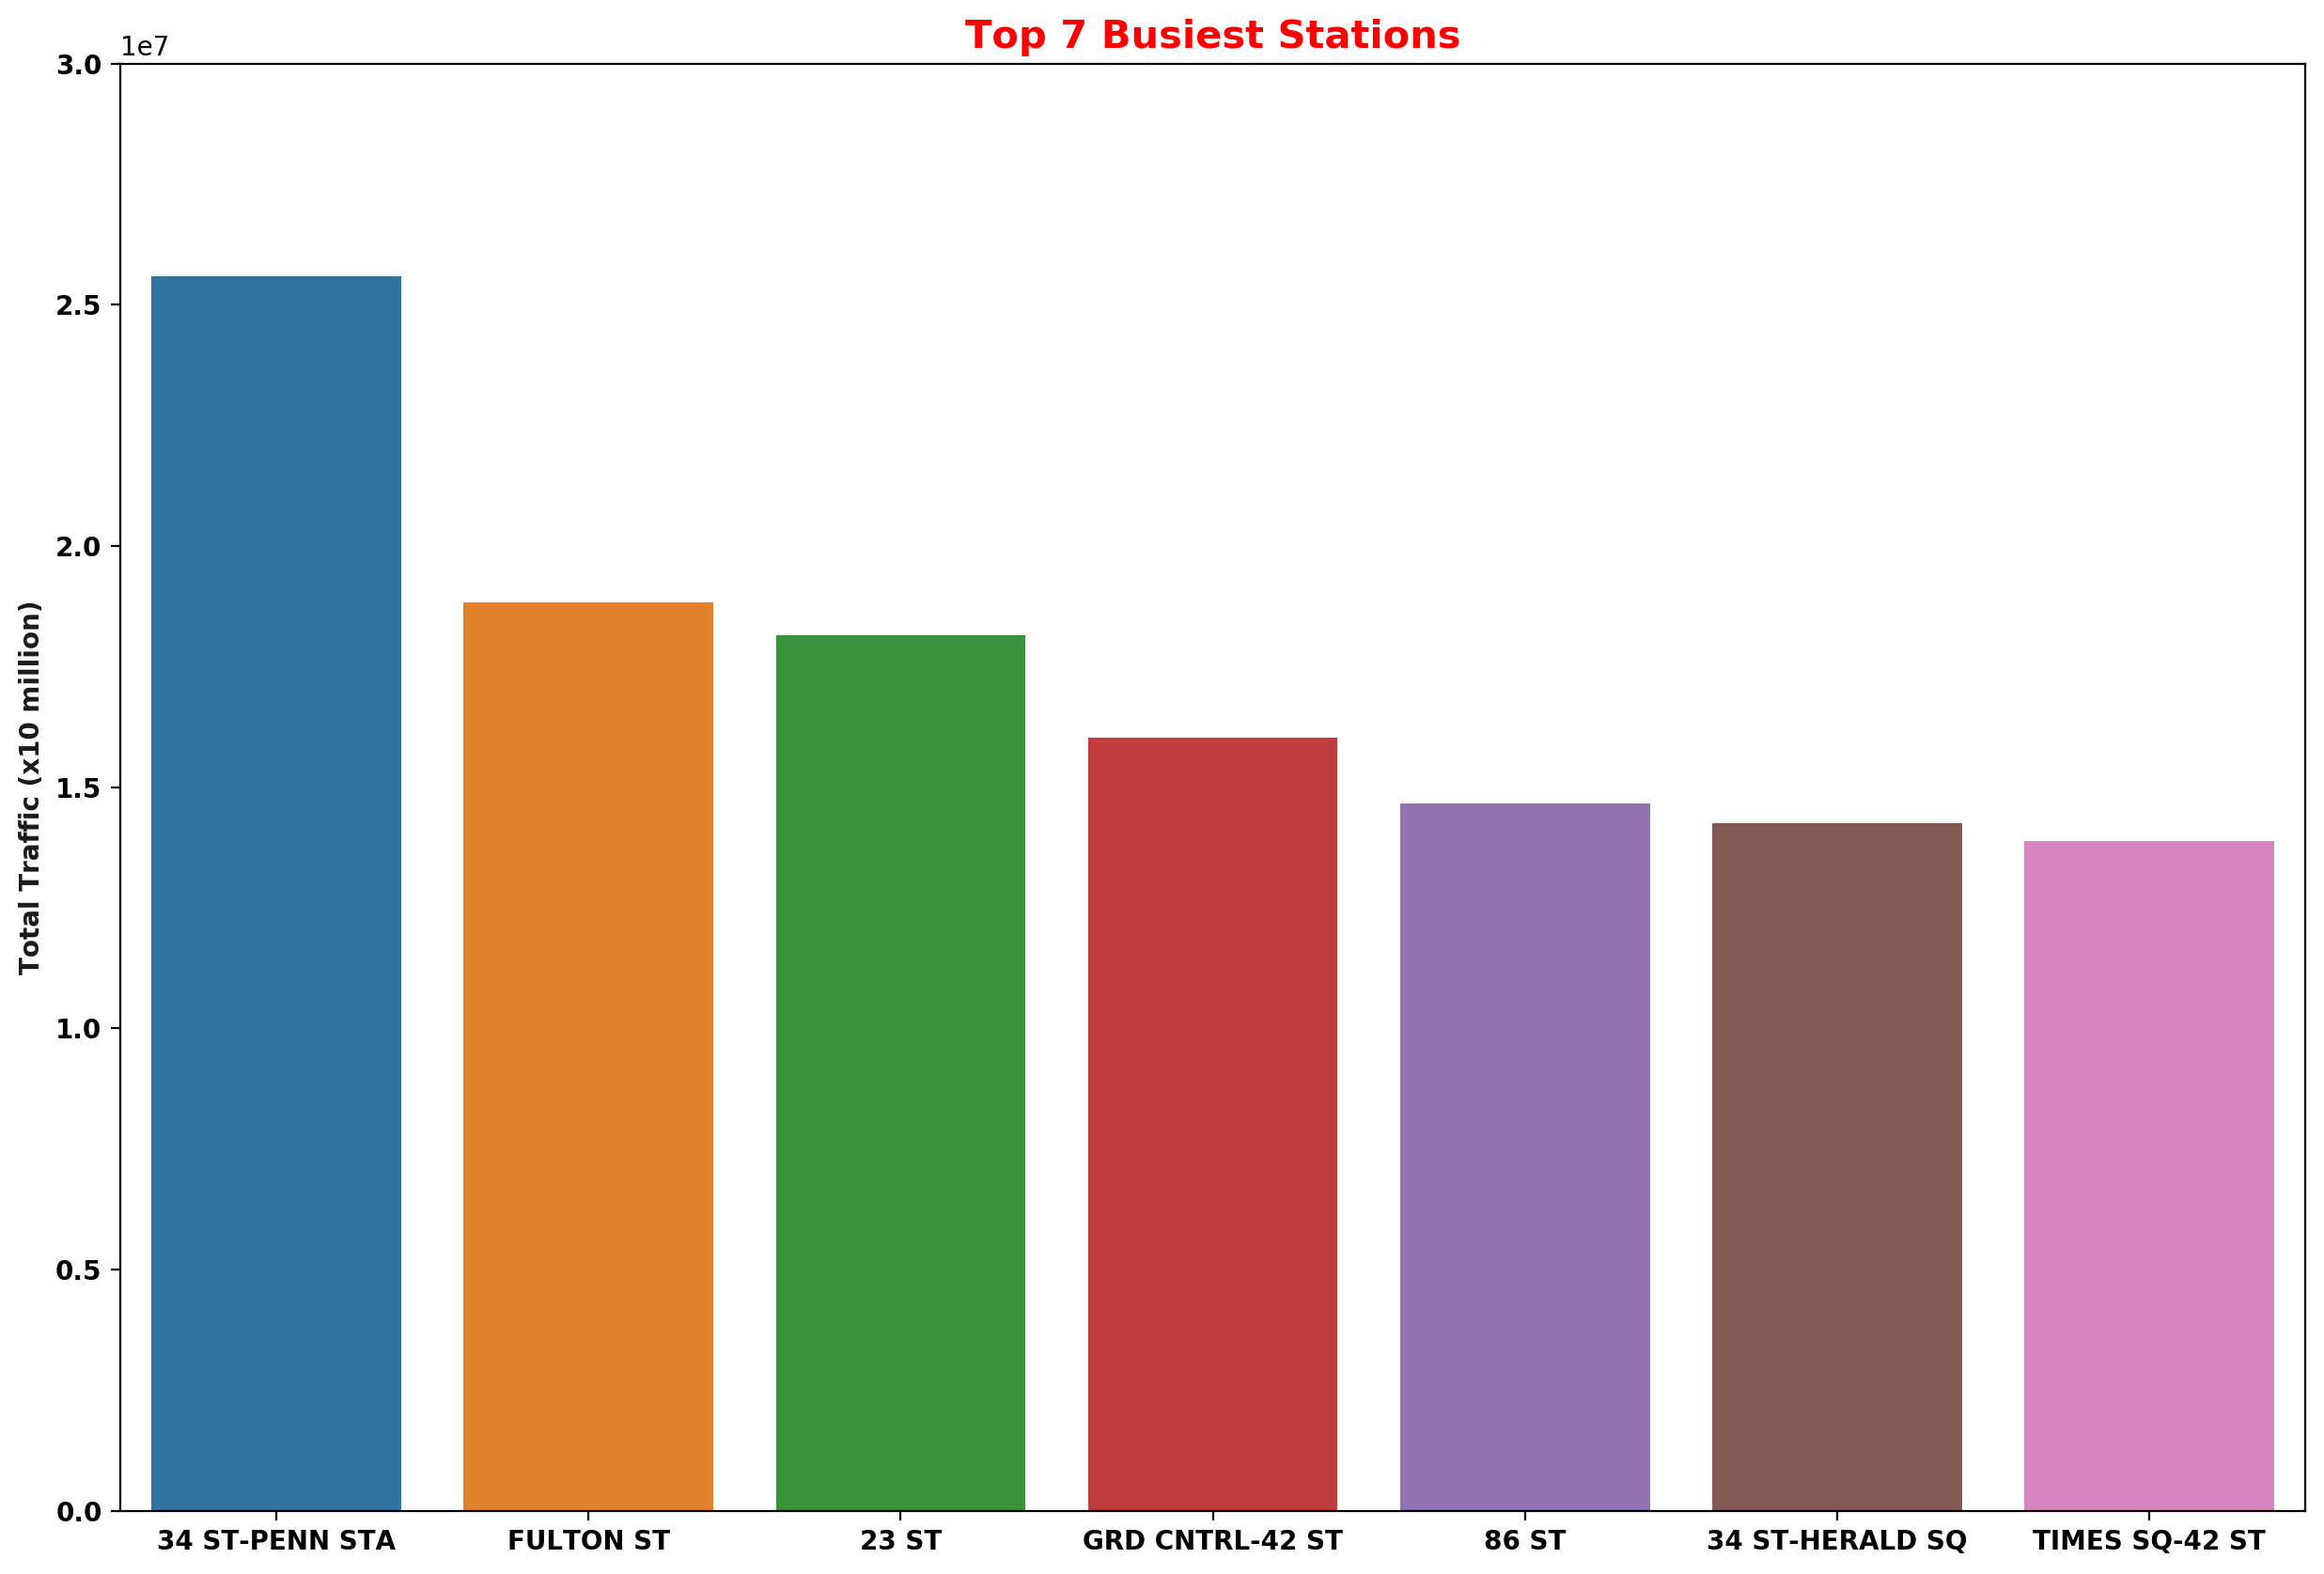

In [595]:
#Barplot for Top 7 Busiest Stations

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=mta_top7)
plt.title("Top 7 Busiest Stations", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic (x10 million)",weight= "bold",c="k")
plt.ylim(0,30000000)
plt.yticks(weight="bold")
plt.savefig('images/01_Top7BusiesStationsBarPlot.png', dpi=200)
plt.show()

In [48]:
# Finding overall busiest day based on traffic

mta_busiest_day = mta_entries_exits.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day


,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,Wednesday,11306781039,6808612415,160998291
1,Thursday,9823687333,7138397560,160558990
2,Friday,8901343359,4312223082,158211143
3,Tuesday,4171175196,6443719717,156970284
4,Monday,2925417748,2652458423,143768592
5,Saturday,824702021,552776375,97549070
6,Sunday,3122047140,986299951,78923736


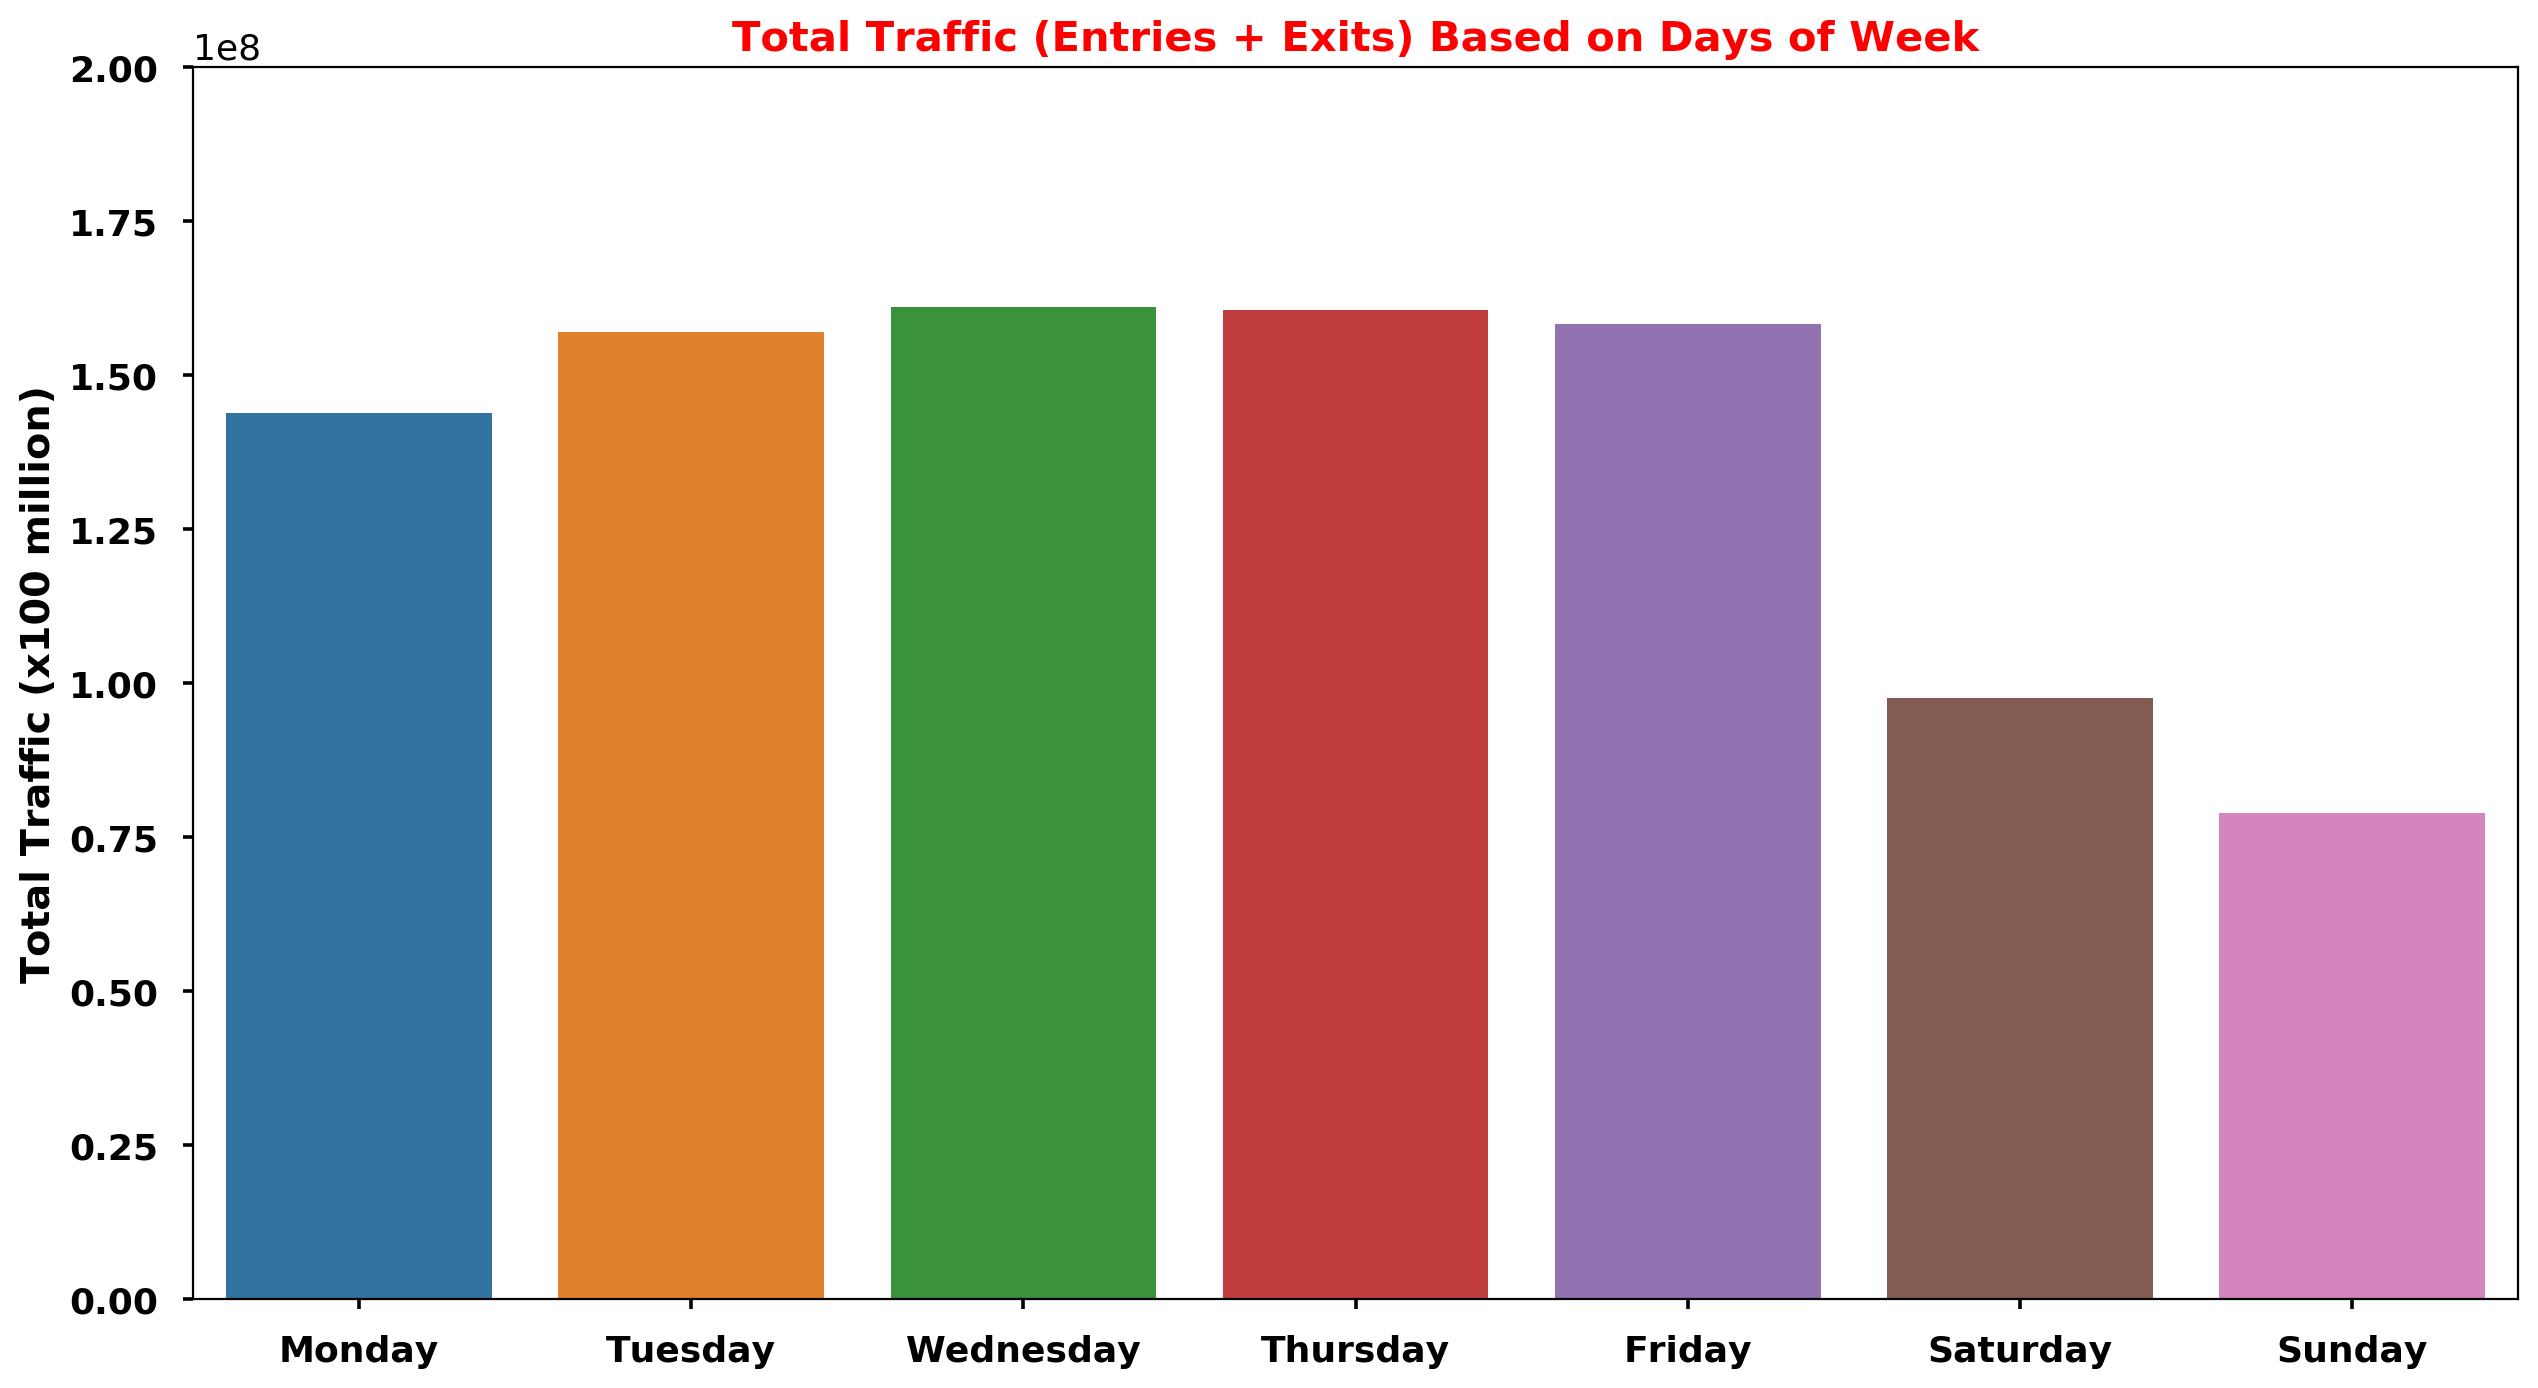

In [594]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="NAMEOFDAY",y="TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic (Entries + Exits) Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic (x100 million)",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,200000000)
plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()


In [255]:
top7_station_list = mta_top7["STATION"]
top7_station_list

0     34 ST-PENN STA
1          FULTON ST
2              23 ST
3    GRD CNTRL-42 ST
4              86 ST
5    34 ST-HERALD SQ
6     TIMES SQ-42 ST
Name: STATION, dtype: object

In [257]:
#Daily Usage for Top 7 Stations
mta_top7_daily = mta_entries_exits.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily = mta_top7_daily[(mta_top7_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_top7_daily["STATION"]=="FULTON ST")
                  | (mta_top7_daily["STATION"]=='23 ST')
                  | (mta_top7_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (mta_top7_daily["STATION"]=="86 ST")
                  | (mta_top7_daily["STATION"]=="34 ST-HERALD SQ")
                  | (mta_top7_daily["STATION"]=="TIMES SQ-42 ST")]


mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,322,23 ST,Friday,10386908,23212182,3103210
1,323,23 ST,Monday,4116005,3419985,2801749
2,324,23 ST,Saturday,1010871,797989,1790481
3,325,23 ST,Sunday,12895278,15128519,1314159
4,326,23 ST,Thursday,2465612,1894113,3064068
5,327,23 ST,Tuesday,6344036,1365730759,2999328
6,328,23 ST,Wednesday,23923332,48345175,3073773
7,413,34 ST-HERALD SQ,Friday,2471655,2403555,2192143
8,414,34 ST-HERALD SQ,Monday,2158614,2025777,2059172
9,415,34 ST-HERALD SQ,Saturday,1294274,1294518,1814556


In [258]:
#Reindex for top7 daily data frame

mta_top7_daily_order = mta_top7_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])

mta_top7_daily_order

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
1,323,23 ST,Monday,4116005,3419985,2801749
5,327,23 ST,Tuesday,6344036,1365730759,2999328
6,328,23 ST,Wednesday,23923332,48345175,3073773
4,326,23 ST,Thursday,2465612,1894113,3064068
0,322,23 ST,Friday,10386908,23212182,3103210
2,324,23 ST,Saturday,1010871,797989,1790481
3,325,23 ST,Sunday,12895278,15128519,1314159
8,414,34 ST-HERALD SQ,Monday,2158614,2025777,2059172
12,418,34 ST-HERALD SQ,Tuesday,135380811,117635615,2144725
13,419,34 ST-HERALD SQ,Wednesday,2533189,2397021,2160383


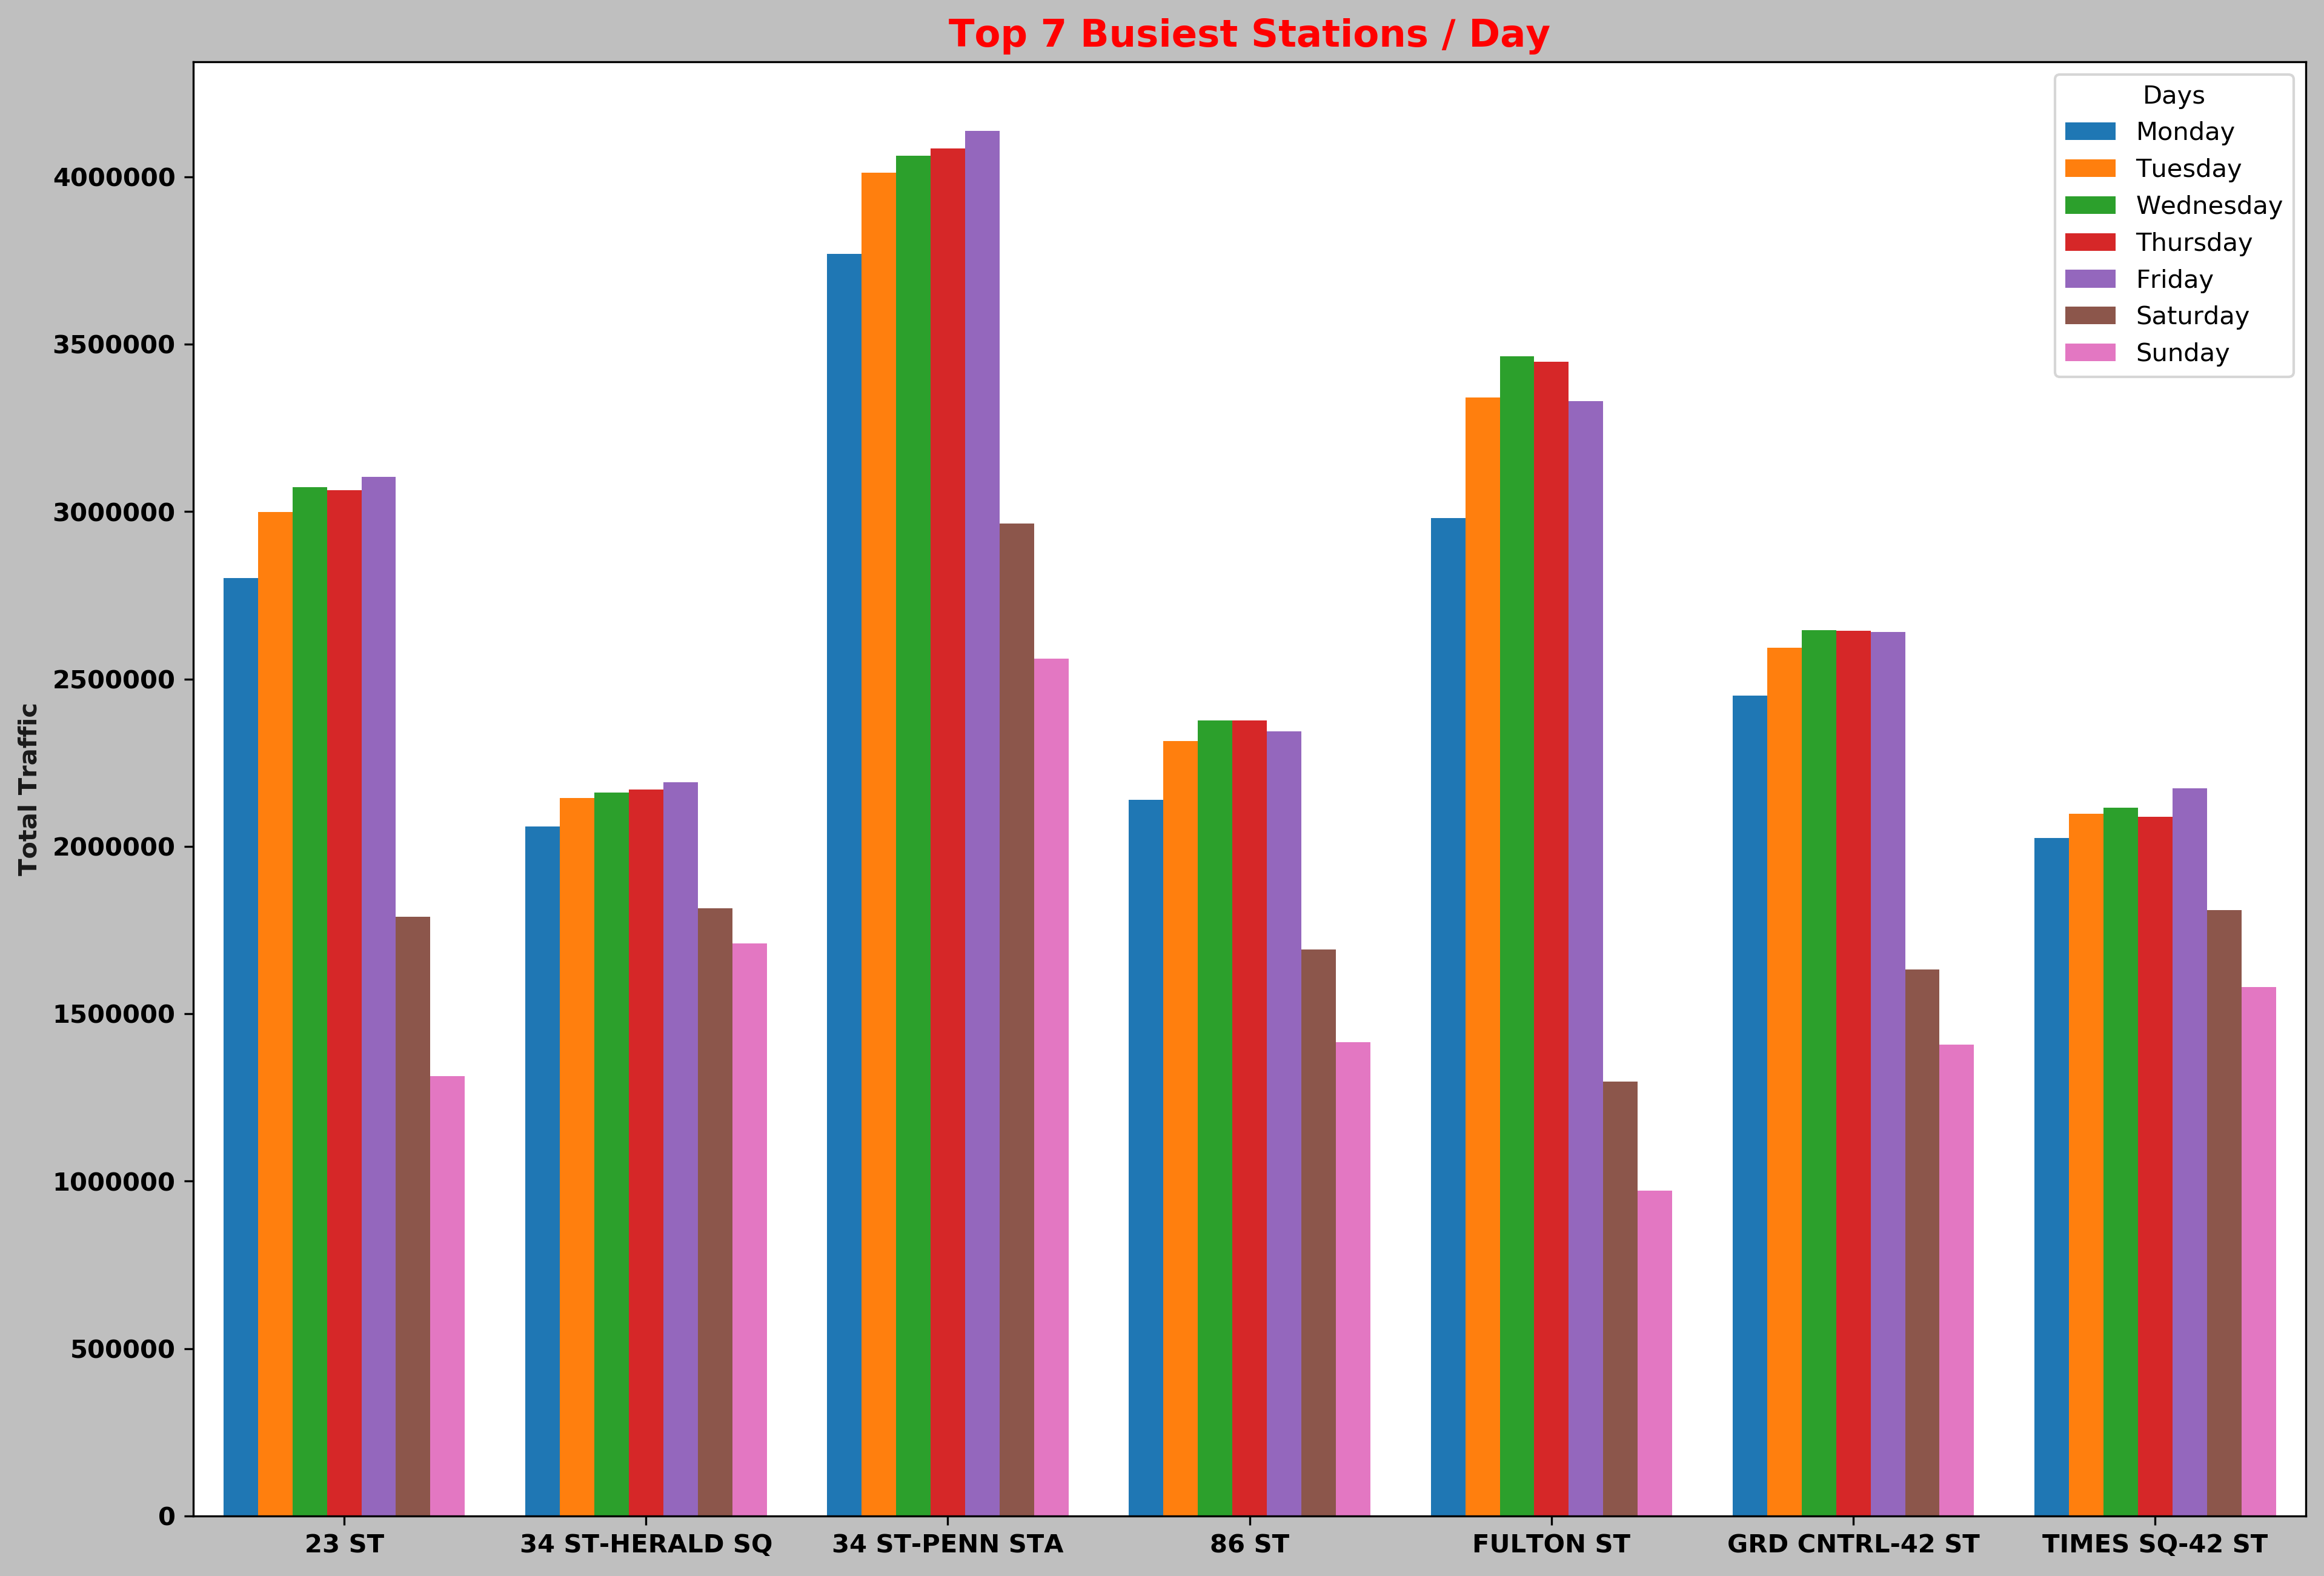

In [593]:
#Barplot for Top 7 Busiest Stations per Day

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top7_daily_order, saturation=1)
plt.title("Top 7 Busiest Stations / Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('images/03_Top7BusiestStationsPerDayBarPlot.png', dpi=200)
plt.show()

In [260]:
#Creating Pivot table for heatmap

mta_top7_heatmap = mta_top7_daily_order.groupby(["STATION","NAMEOFDAY"]).TRAFFIC.mean().reset_index()

mta_top7_heatmap = mta_top7_heatmap.pivot("NAMEOFDAY","STATION","TRAFFIC")

mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top7_heatmap

STATION,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
NAMEOFDAY,,,,,,,
Monday,2801749,2059172,3770175,2139936,2981244,2451241,2024895
Tuesday,2999328,2144725,4012444,2314433,3340265,2593276,2096823
Wednesday,3073773,2160383,4063172,2376680,3464067,2646575,2115425
Thursday,3064068,2170720,4084697,2376204,3448462,2643513,2088193
Friday,3103210,2192143,4137139,2342906,3329622,2640783,2173738
Saturday,1790481,1814556,2964682,1692383,1296698,1632372,1810083
Sunday,1314159,1711007,2561041,1414891,971693,1408588,1579846


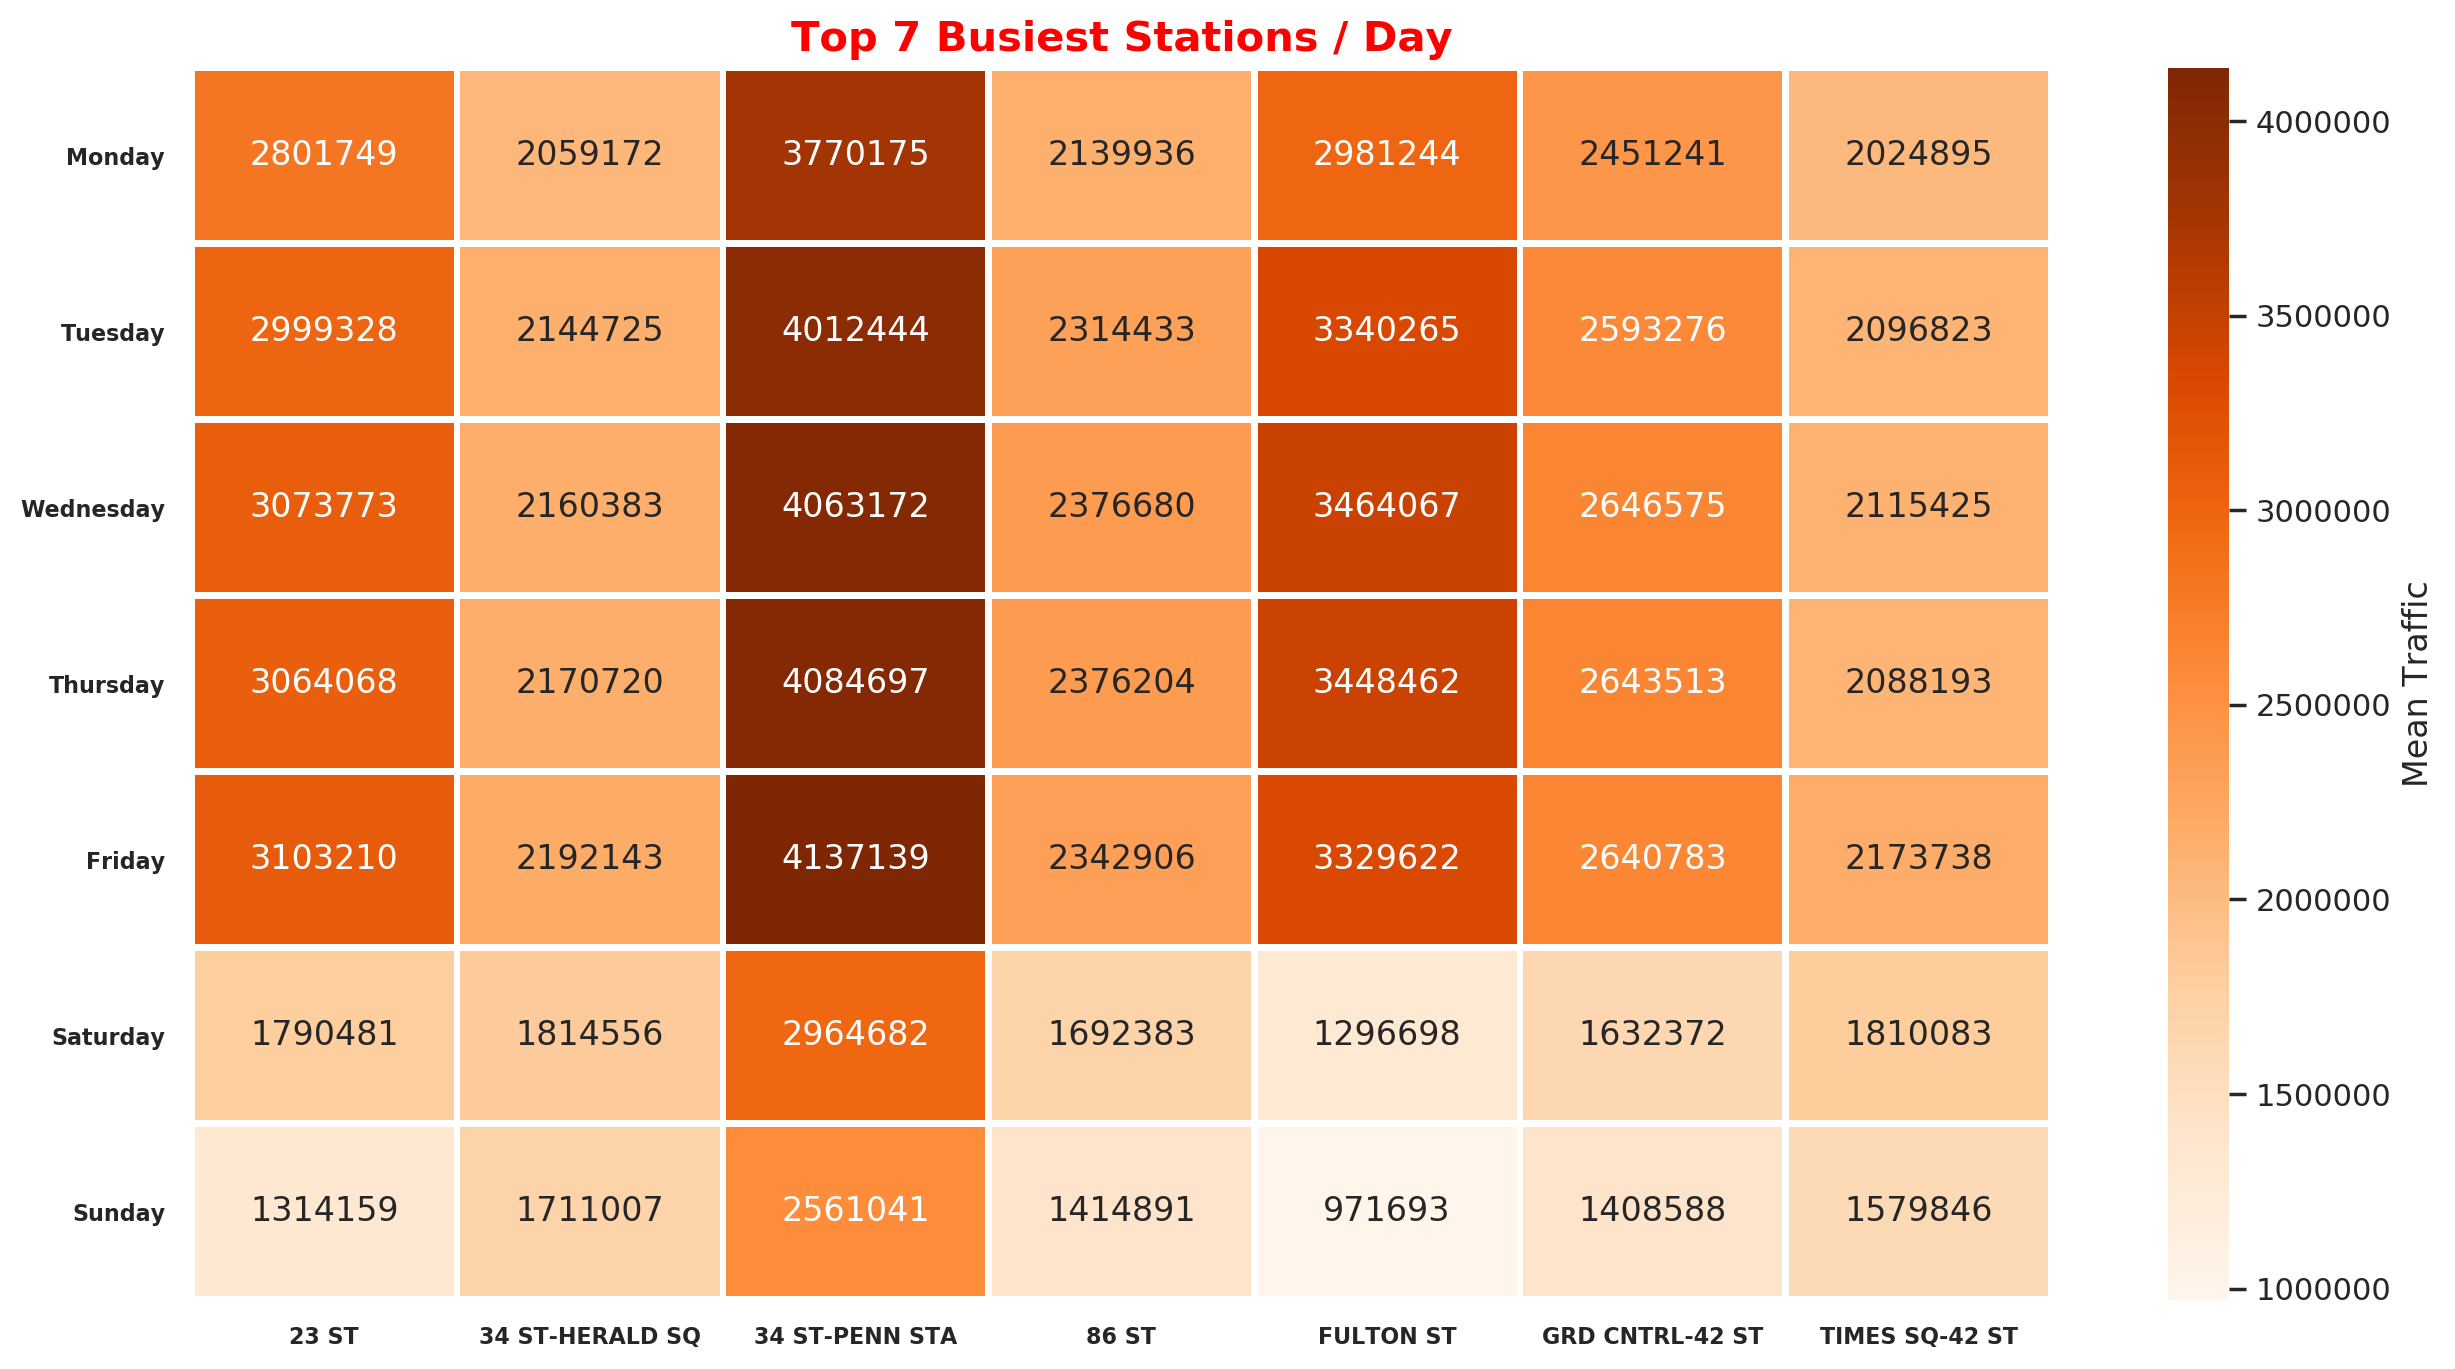

In [596]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top7_heatmap,annot=True,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Mean Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=0,size=8)
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
plt.savefig('images/04_Top7BusiesStationsPerDayHeatmap.png', dpi=200)
plt.show()

In [262]:
#Calculating busiest time
mta_time = mta.sort_values(["STATION","TURNSTILE","DATETIME"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,NaN,NaN
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,589.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,614.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,1054.0,1370.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,804.0


In [263]:
#Checking Diff values for entries and exits
print(mta_time["DIF_ENTRIES"].describe())
print(mta_time["DIF_EXITS"].describe())

count    4.389476e+06
mean     2.037309e+03
std      3.939587e+06
min     -2.071639e+09
25%      8.000000e+00
50%      6.700000e+01
75%      2.250000e+02
max      2.088503e+09
Name: DIF_ENTRIES, dtype: float64
count    4.389476e+06
mean     7.239409e+02
std      3.102654e+06
min     -1.897280e+09
25%      7.000000e+00
50%      4.800000e+01
75%      1.560000e+02
max      2.107590e+09
Name: DIF_EXITS, dtype: float64


In [264]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
39327
Negative values for DIF_EXITS column:
31602


In [269]:
mta_time["DIF_ENTRIES"].median()

67.0

In [266]:
mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > 663] = (mta_time["DIF_ENTRIES"].median()) 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > 540] = (mta_time["DIF_EXITS"].median()) 

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [267]:
mta_time["DIF_EXITS"].describe()

count    4.394408e+06
mean     8.940953e+01
std      1.144590e+02
min      0.000000e+00
25%      8.000000e+00
50%      4.800000e+01
75%      1.240000e+02
max      5.400000e+02
Name: DIF_EXITS, dtype: float64

In [268]:
mta_time["DIF_ENTRIES"].describe()

count    4.394408e+06
mean     1.220328e+02
std      1.503640e+02
min      0.000000e+00
25%      9.000000e+00
50%      6.700000e+01
75%      1.810000e+02
max      6.630000e+02
Name: DIF_ENTRIES, dtype: float64

In [270]:
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,0.0,0.0,0.0
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0,257.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0,441.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,48.0,493.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,48.0,549.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0,649.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0,142.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0,369.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,67.0,48.0,115.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,48.0,679.0


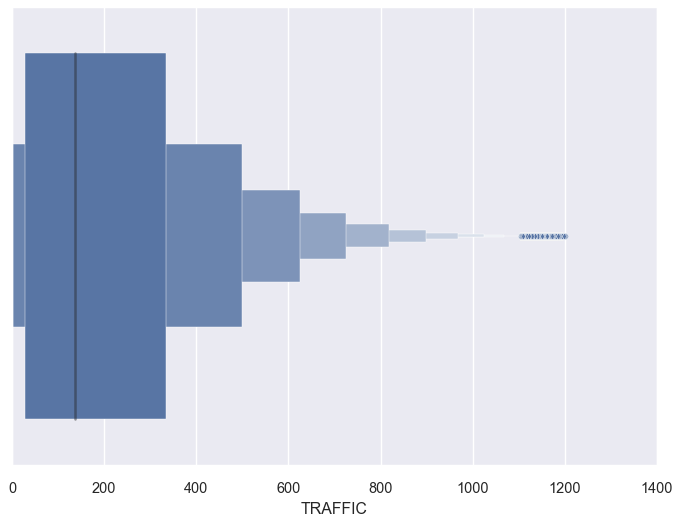

In [271]:
sns.boxenplot(mta_time["TRAFFIC"])

In [272]:
mta_time.groupby(["STATION"]).sum().sort_values("TRAFFIC", ascending=False).head(7)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
STATION,,,,,,
34 ST-PENN STA,8223702618,3553264755271,3757711248727,13778745.0,10703234.0,24481979.0
23 ST,6165167551,5396339801230,5669192421356,9675497.0,7735802.0,17411299.0
FULTON ST,7729610960,3950882565417,4024736982148,8652135.0,6730559.0,15382694.0
GRD CNTRL-42 ST,9606311001,2220289633343,2117582801802,8005223.0,6679059.0,14684282.0
34 ST-HERALD SQ,3584066328,4307758837019,5402831394188,7247160.0,6840084.0,14087244.0
125 ST,4777077920,4980160629760,2966373052389,7798203.0,6222431.0,14020634.0
42 ST-PORT AUTH,2405035703,7057744704941,5768779360597,8669231.0,5246874.0,13916105.0


In [435]:
mta_time_a=mta_time[mta_time["STATION"]=="34 ST-PENN STA"]
stations_day_time = mta_time_a[['STATION', 'TIME', 'NAMEOFDAY','TRAFFIC']]
stations_day_time_group = stations_day_time.groupby(['STATION','NAMEOFDAY','TIME'], as_index=False)
stations_day_time = stations_day_time_group[['TRAFFIC']].sum()
rounded_day_time = stations_day_time.set_index('TIME').groupby(['STATION','NAMEOFDAY'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head()

,STATION,NAMEOFDAY,TIME,TRAFFIC
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,408658.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,168538.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,709018.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,849972.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,934872.0


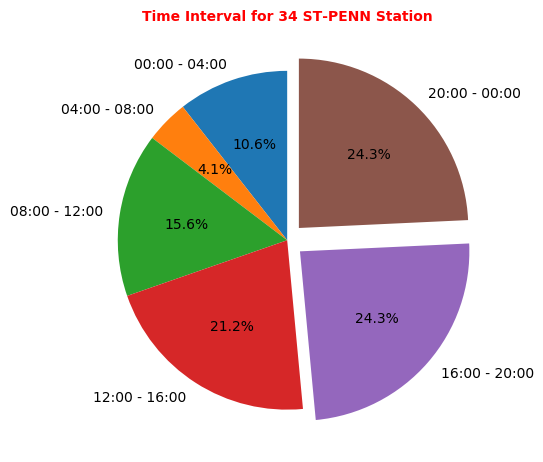

In [598]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [2640492.0, 1027607.0, 3911037.0, 5288291.0,6061954.0,6061954.0]
explode = (0, 0, 0, 0, 0.1 ,0.1)  
ax1.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="red", fontsize=10)
plt.savefig('images/05_TimeIntervalforTop1BusiestStationPieChart.png', dpi=200)
plt.show()

In [443]:
rounded_day_time.head(10)

,STATION,NAMEOFDAY,TIME,TRAFFIC
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,408658.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,168538.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,709018.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,849972.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,934872.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,892989.0
6,34 ST-PENN STA,Monday,1900-01-01 00:00:00,282069.0
7,34 ST-PENN STA,Monday,1900-01-01 04:00:00,145267.0
8,34 ST-PENN STA,Monday,1900-01-01 08:00:00,603493.0
9,34 ST-PENN STA,Monday,1900-01-01 12:00:00,758653.0


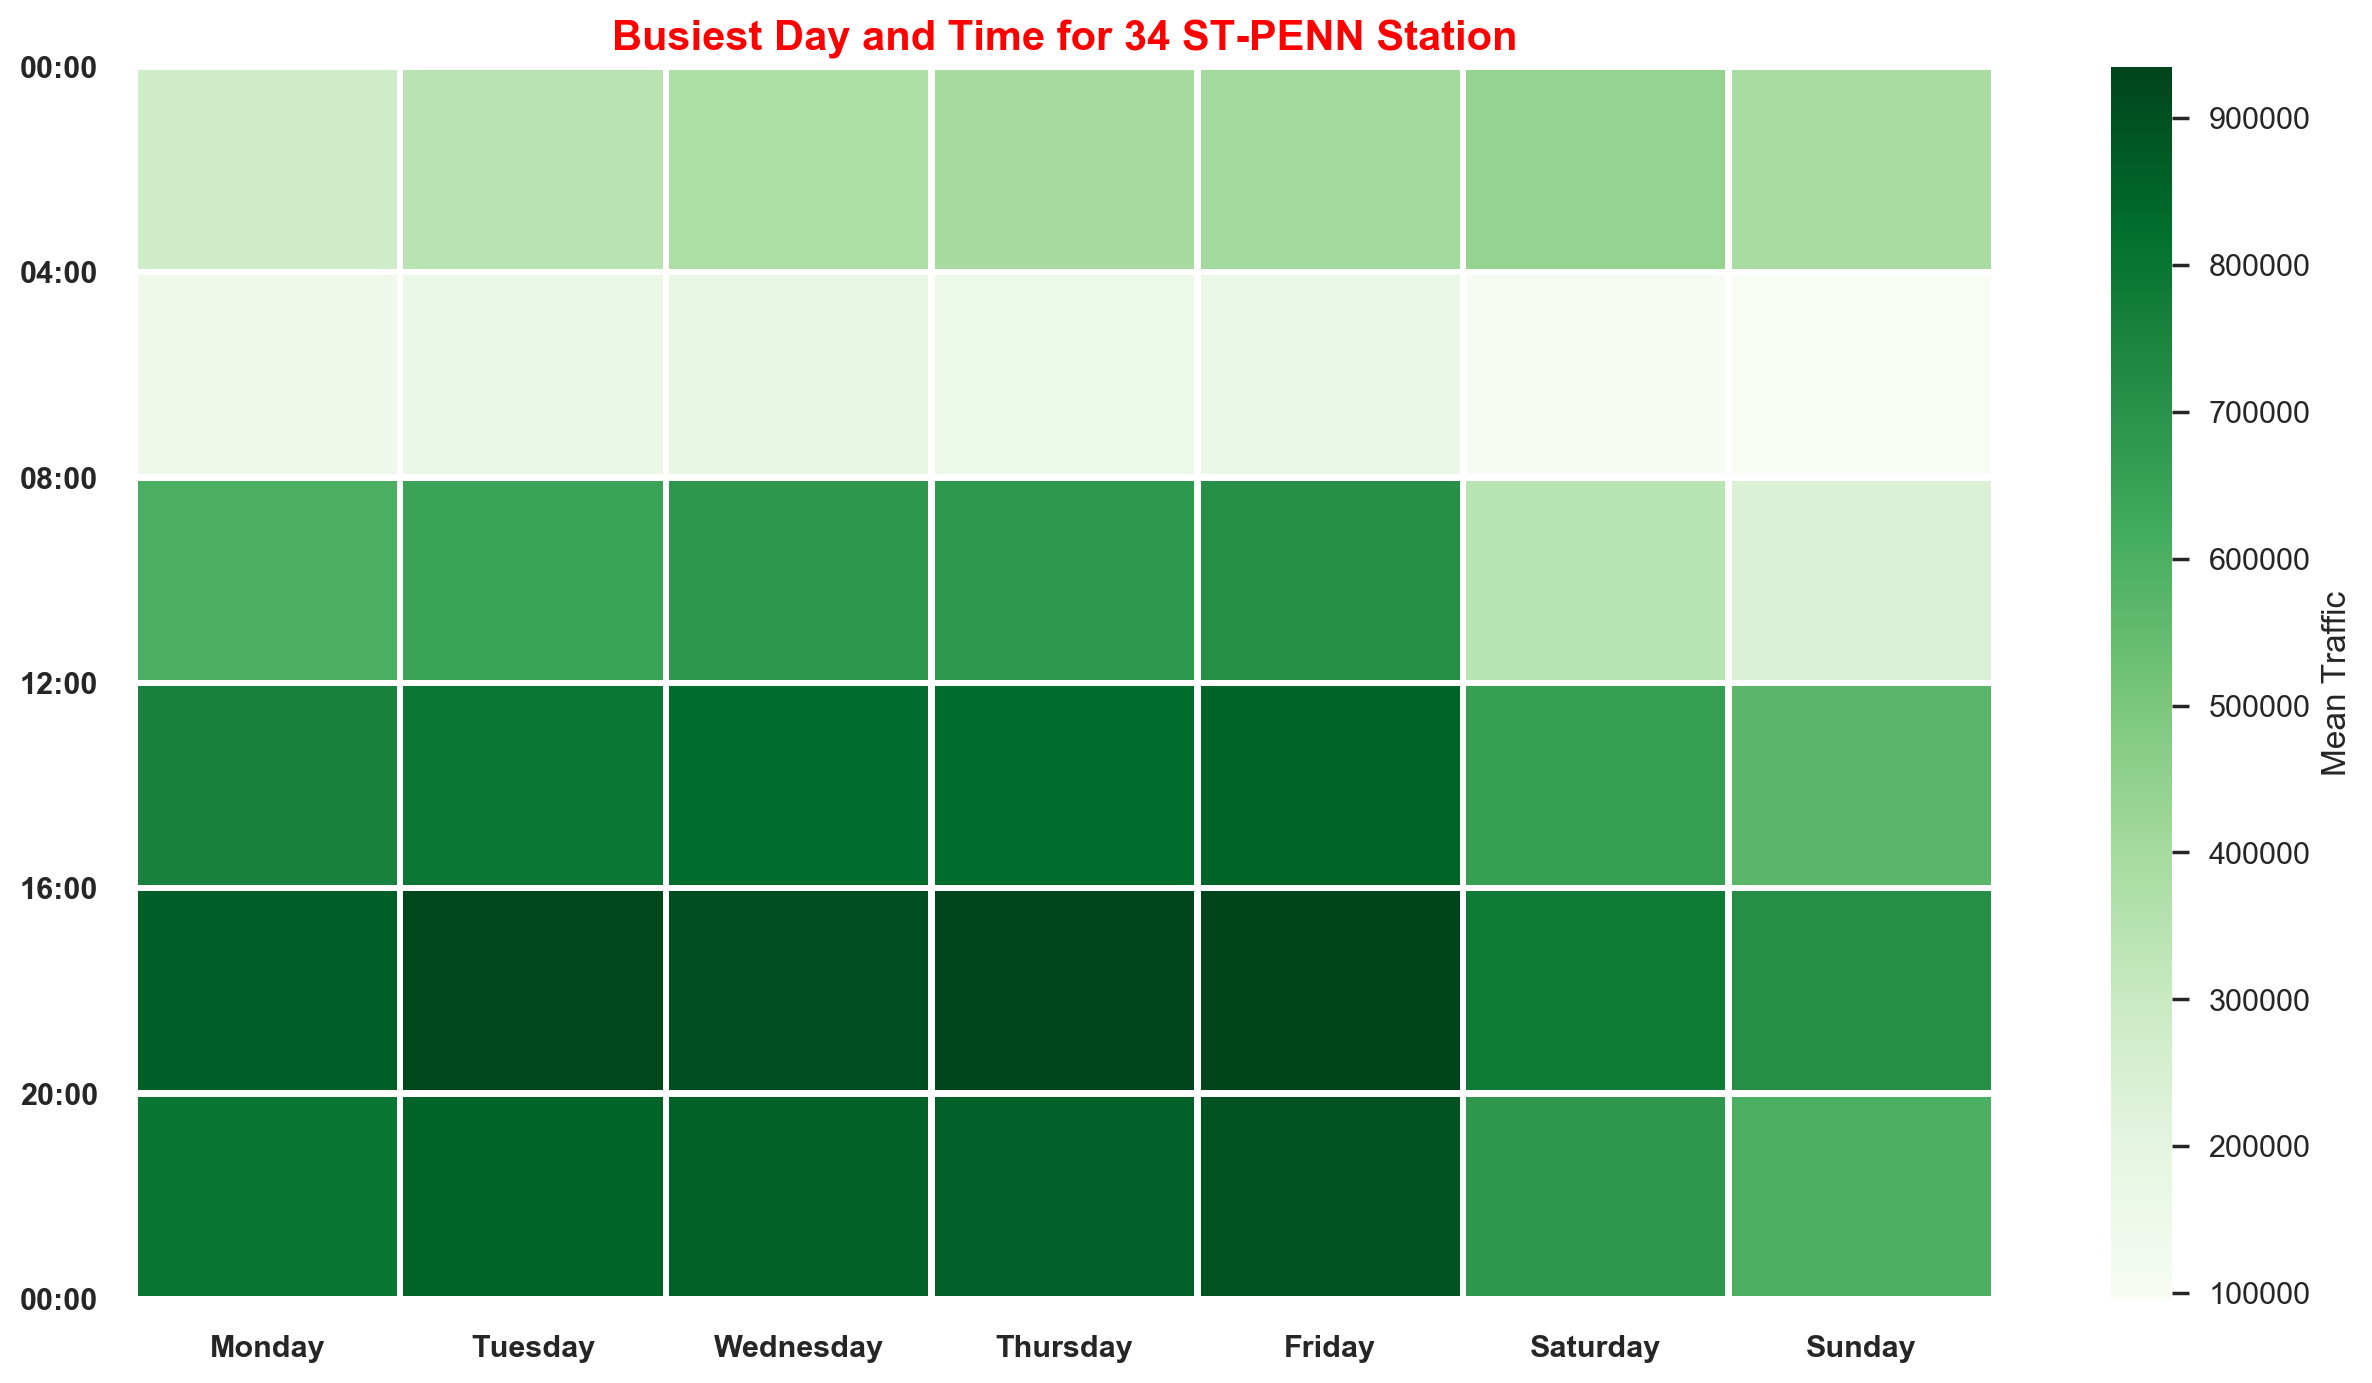

In [600]:
#Heatmap for top7 stations per day

#Creating Pivot table for heatmap

mta_top1_heatmap_detail = rounded_day_time.groupby(["NAMEOFDAY","TIME"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="TIME", columns="NAMEOFDAY",values="TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#mta_top1_heatmap

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Mean Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.savefig('images/06_Top1BusiesStationsPerDayPerTimeHeatmap.png', dpi=200)
plt.show()